___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Pandas Recap Lesson, Session-01</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Groupby(), Map(), Apply(), Applymap() & Transform()</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [THE MAP() METHOD](#1)
* [THE APPLY() METHOD](#2)
* [THE APPLYMAP() METHOD](#3)
* [COMBINING LAMBDA FUNCTION WITH APPLY()](#4)
* [THE TRANSFORM() METHOD](#5)
* [THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET](#6)
* [The End of the Recap Session](#7)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

When working with Seaborn, we can either use one of the built-in datasets that Seaborn offers or we can load a Pandas DataFrame. Seaborn is part of the PyData stack hence accepts Pandas' data structures. Let us begin by importing few built-in datasets but before that we shall import few other libraries as well that our Seaborn would depend upon:

In [189]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings('ignore') 

np.random.seed(42)

In [190]:
# from sklearn.datasets import load_iris

# data = load_iris()
# features = pd.DataFrame(data = data['data'], columns=data['feature_names'])
# features.head() #glance at the data 

In [191]:
# sns.get_dataset_names()

In [192]:
df0 = sns.load_dataset("iris")
df = df0.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris dataset actually has 50 samples from each of three species of Iris flower (Setosa, Virginica and Versicolor). Four (4) features were measured (in centimeters) from each sample: Length and Width of the Sepals and Petals For More Information you can visit [SOURCE01](https://en.wikipedia.org/wiki/Iris_flower_data_set), [SOURCE02](https://github.com/mwaskom/seaborn-data) & [SOURCE03](http://seaborn.pydata.org/).

Let us try to have a summarized view of this dataset:

In [193]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**.describe()** is a very useful method in Pandas as it generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values. 

In [194]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Without getting in-depth into analysis here, let us try to plot something simple from this dataset:

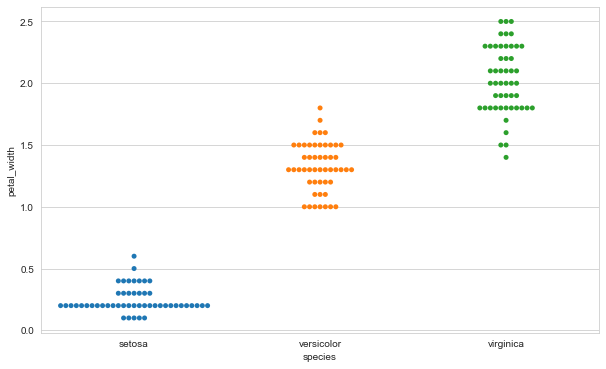

In [196]:
plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
sns.swarmplot(x="species", y="petal_width", data=df);

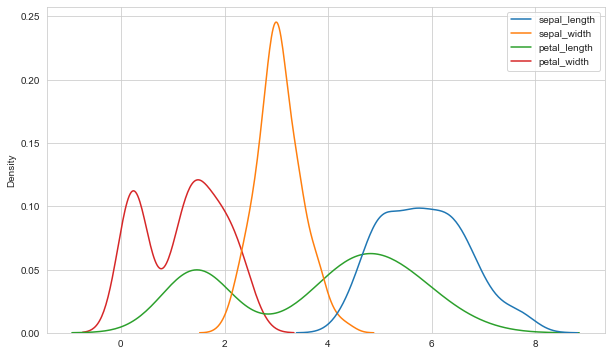

In [197]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df);

In [198]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


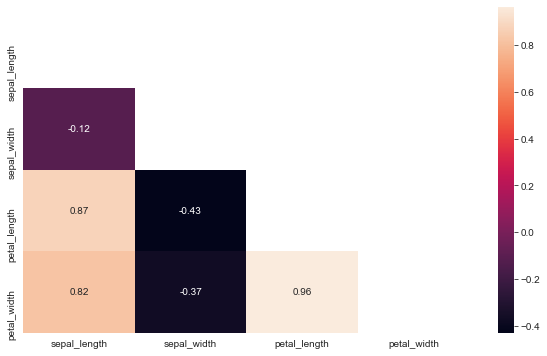

In [199]:
plt.figure(figsize=(10, 6))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix);

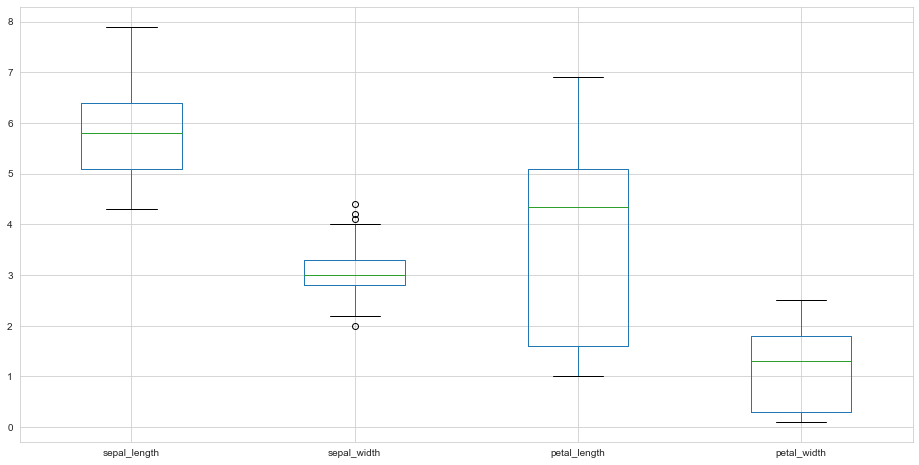

In [200]:
df.plot.box(figsize=(16, 8));

![image.png](https://i.ibb.co/rMp64hf/apply-map-applymap.png)

When we work with real-world data, the datasets are rarely or probably never in the exact format ready for our analytic purposes. Thus, an essential step in the data processing phase is to convert the data from the raw undesirable format to an analysis-friendly format. Besides handling missing data and outliers, another crucial data conversion procedure is data mapping. Originally as a mathematic concept, mapping is the process of creating a new set of values from an existing set of values, usually on a one-to-one basis [SOURCE01](https://towardsdatascience.com/understand-map-function-to-manipulate-pandas-series-8ac340d514f7). 

Therefore, in Data Processing, it is often necessary to perform operations (such as statistical calculations, splitting, or substituting value) on a certain row or column to obtain new data. Usually, we need to apply certain functions over DataFrame columns or rows in order to either update values or even create new columns. 

Writing a for-loop to iterate through Pandas DataFrame and Series will do the job, but that doesn’t seem like a good idea. The for-loop tends to have more lines of code, less code readability, and slower performance. Fortunately, there are already great methods that are built into Pandas to help you accomplish the goals! The most commonly used operations for doing so in pandas, are apply, map and applymap methods [SOURCE02](https://towardsdatascience.com/apply-vs-map-vs-applymap-pandas-529acdf6d744) & [SOURCE03](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff).

In this session, we will see how to perform operations using **``apply()``** and **``applymap()``** and how to substitute value using **``map()``**. Moreover, we will focus on the operations of **``transform()``** and its difference from others.

You can also visit [this great discussion](https://stackoverflow.com/questions/46210678/whats-the-difference-between-transform-vs-applymap-for-pandas-dataframe) on the differences among them at Stackoverflow.

**Before we dive into the details, let's first create a DataFrame for demonstration.**

In [201]:
sample_df = pd.DataFrame({'A': [1, 2, 3, np.nan],
                          'B': [10, 20, 30, 40],
                          'C': [20, 40, 60, 80]}, 
                      index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
sample_df

,A,B,C
Row 1,1.0,10,20
Row 2,2.0,20,40
Row 3,3.0,30,60
Row 4,NaN,40,80


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE MAP() METHOD</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

As one of the most popular Python libraries for data science research, the pandas library provides us with the **``map()``** function **to manipulate the Series data**. Once you have a good understanding of the **``map()``** function, we can move on to the study of the other more powerful data manipulation function ``**apply()``** in this session.

**``pandas.Series.map``** method can **applied only over pandas Series objects** and is used to map the values of the Series based on the input which is used to substitute each value with the specified value that is **derived from a dictionary, a function or even another Series object**.

Note that the method operates over one element at a time and missing values will be denoted as NaN in the output.

The **``map()``** function has the following syntax: 
- Series.map(self, arg, na_action=None)<br> 

As you can see, the caller of this function is a pandas Series, and we can say the **``map()``** function is **an instance method** for a Series object. The instance method performs a set of actions on the data/value provided by the instance variables. A instance method is bound to the object of the class. It can access or modify the object state by changing the value of a instance variables [SOURCE](https://pynative.com/python-instance-methods/#:~:text=In%20Python%20object%2Doriented%20programming,instance%20methods%20and%20class%20methods.&text=Instance%20methods%3A%20Used%20to%20access,refer%20to%20the%20current%20object.). 

In [202]:
# this is what we can do with the map function and put a function call cm_to_mm inside. 

def cm_to_mm(cm):  #This is a user-defined function
    mm = cm * 10
    return mm

lambda x: x*10  # This is a anonymous function

<function __main__.<lambda>(x)>

**How to use map()?**

**``DO NOT FORGET``** **``map()``** is **only available in Series** and used for substituting each value in a Series with another value.

The fun part of the **``map()``** function is mostly about how we can play with the **``arg``** argument. Specifically, the arg argument gives the instruction to the function on how to map the existing data to the new data. This argument can be set either as **``a function``** or as **``a dictionary``**. Let’s see how each works.

**Parameters**
- **``arg :``** function, collections.abc.Mapping subclass or Series
    - Mapping correspondence.

- **``na_action :``** {None, 'ignore'}, default None
    - If 'ignore', propagate NaN values, without passing them to the mapping correspondence.

**Returns**
- Series
    - Same index as caller.

In [203]:
# sample_df.map(cm_to_mm)

# Gives an error of "AttributeError: 'DataFrame' object has no attribute 'map'"

In [204]:
# Using a Regular Function

print(sample_df)
sample_df["A"].map(cm_to_mm)

         A   B   C
Row 1  1.0  10  20
Row 2  2.0  20  40
Row 3  3.0  30  60
Row 4  NaN  40  80


Row 1    10.0
Row 2    20.0
Row 3    30.0
Row 4     NaN
Name: A, dtype: float64

In [205]:
# Using a Lambda Function

sample_df["A"].map(lambda x: x*10)

Row 1    10.0
Row 2    20.0
Row 3    30.0
Row 4     NaN
Name: A, dtype: float64

In [206]:
# Using a Dictionary

sample_df["B"].map({10: 100, 40: 400})

Row 1    100.0
Row 2      NaN
Row 3      NaN
Row 4    400.0
Name: B, dtype: float64

**One thing to note above** is that if the values are **not found** in the dictionary, the mapped values will be **``NaN``**.

In [207]:
sample_df["A"].map("My favourite number is {}".format, na_action=None)

Row 1    My favourite number is 1.0
Row 2    My favourite number is 2.0
Row 3    My favourite number is 3.0
Row 4    My favourite number is nan
Name: A, dtype: object

In [208]:
sample_df["A"].map("My favourite number is {}".format, na_action="ignore")

Row 1    My favourite number is 1.0
Row 2    My favourite number is 2.0
Row 3    My favourite number is 3.0
Row 4                           NaN
Name: A, dtype: object

**Now it's time to play with "iris" dataset, which is a seaborn built-in dataset.**

In [209]:
df['sepal length (mm)'] = df['sepal_length'].map(cm_to_mm) # this time we have used the function defined above 
                                                           # on the column of "sepal_length" which is a pandas series
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal length (mm)
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,3.2,1.3,0.2,setosa,47.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,67.0
146,6.3,2.5,5.0,1.9,virginica,63.0
147,6.5,3.0,5.2,2.0,virginica,65.0
148,6.2,3.4,5.4,2.3,virginica,62.0


In [210]:
# 1st Method to rearrange the columns' order

# df.drop("sepal length (mm)", axis=1, inplace=True)

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal length (mm)'],
      dtype='object')

In [211]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal length (mm)', 'species']

df = df.reindex(columns=column_names)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa


In [212]:
# 2nd Method to rearrange the columns' order

a = df['sepal_length'].map(cm_to_mm).to_list()
a

[51.0,
 49.0,
 47.0,
 46.0,
 50.0,
 54.0,
 46.0,
 50.0,
 44.0,
 49.0,
 54.0,
 48.0,
 48.0,
 43.0,
 58.0,
 57.0,
 54.0,
 51.0,
 57.0,
 51.0,
 54.0,
 51.0,
 46.0,
 51.0,
 48.0,
 50.0,
 50.0,
 52.0,
 52.0,
 47.0,
 48.0,
 54.0,
 52.0,
 55.0,
 49.0,
 50.0,
 55.0,
 49.0,
 44.0,
 51.0,
 50.0,
 45.0,
 44.0,
 50.0,
 51.0,
 48.0,
 51.0,
 46.0,
 53.0,
 50.0,
 70.0,
 64.0,
 69.0,
 55.0,
 65.0,
 57.0,
 63.0,
 49.0,
 66.0,
 52.0,
 50.0,
 59.0,
 60.0,
 61.0,
 56.0,
 67.0,
 56.0,
 58.0,
 62.0,
 56.0,
 59.0,
 61.0,
 63.0,
 61.0,
 64.0,
 66.0,
 68.0,
 67.0,
 60.0,
 57.0,
 55.0,
 55.0,
 58.0,
 60.0,
 54.0,
 60.0,
 67.0,
 63.0,
 56.0,
 55.0,
 55.0,
 61.0,
 58.0,
 50.0,
 56.0,
 57.0,
 57.0,
 62.0,
 51.0,
 57.0,
 63.0,
 58.0,
 71.0,
 63.0,
 65.0,
 76.0,
 49.0,
 73.0,
 67.0,
 72.0,
 65.0,
 64.0,
 68.0,
 57.0,
 58.0,
 64.0,
 65.0,
 77.0,
 77.0,
 60.0,
 69.0,
 56.0,
 77.0,
 63.0,
 67.0,
 72.0,
 62.0,
 61.0,
 64.0,
 72.0,
 74.0,
 79.0,
 64.0,
 63.0,
 61.0,
 77.0,
 63.0,
 64.0,
 60.0,
 69.0,
 67.0,
 69.0,
 58.0,

In [213]:
df.insert(4, 'sample_sepal_length (mm)', a)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sample_sepal_length (mm),sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,47.0,setosa


In [214]:
df.drop("sample_sepal_length (mm)", axis=1, inplace=True)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa


In [215]:
# df[['sepal_width',"petal_length", "petal_width"]].map(cm_to_mm)

# Gives "AttributeError: 'DataFrame' object has no attribute 'map'" WHY?

In [216]:
#  df.drop(['sepal width (mm)',"petal length (mm)", "petal width (mm)"], axis=1, inplace=True)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLY() METHOD</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``Pandas.apply``** allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.

The Pandas **``apply()``** is used to apply a function along an axis of the **DataFrame** OR on values of **Series**.

**Syntax:**
- DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs) [SOURCE](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)
- Series.apply(func, convert_dtype=True, args=(), **kwargs) [SOURCE](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

For a better understanding of [When should I (not) want to use pandas apply() in my code?](https://stackoverflow.com/questions/54432583/when-should-i-not-want-to-use-pandas-apply-in-my-code) visit the discussion on that at Stackoverflow.

Let's begin with a simple example using our sample_df, to sum each row and save the result to a new column "D"

In [217]:
# Let us first create a custom function

def custom_sum(row):
    return row.sum()

lambda x: x.sum()

<function __main__.<lambda>(x)>

In [218]:
print(sample_df)
sample_df['D'] = sample_df.apply(custom_sum, axis=1)
sample_df


# # You can also use lambda expression with Pandas apply() function. 
# # And the following lambda is equivalent for the custom_sum def function created above:
# df['D'] = df.apply(lambda x: x.sum(), axis=1)

         A   B   C
Row 1  1.0  10  20
Row 2  2.0  20  40
Row 3  3.0  30  60
Row 4  NaN  40  80


,A,B,C,D
Row 1,1.0,10,20,31.0
Row 2,2.0,20,40,62.0
Row 3,3.0,30,60,93.0
Row 4,NaN,40,80,120.0


**Let's take a look df.apply(custom_sum, axis=1)**
- The first parameter custom_sum is a function.
- The second parameter axis is to specify which axis the function is applied to. 0 for applying the function to each column and 1 for applying the function to each row.

In other words, the second parameter axis = 1 tells Pandas to use the row. So, the custom_sum is applied to each row and returns a new Series with the output of each row as value.

In [219]:
# with axis=1

print(sample_df)
sample_df.apply(lambda x: x.sum(), axis=1)

         A   B   C      D
Row 1  1.0  10  20   31.0
Row 2  2.0  20  40   62.0
Row 3  3.0  30  60   93.0
Row 4  NaN  40  80  120.0


Row 1     62.0
Row 2    124.0
Row 3    186.0
Row 4    240.0
dtype: float64

**What about axis=0 ?**

In [220]:
# with axis=0 (default)

print(sample_df)
sample_df.apply(lambda x: x.sum())

         A   B   C      D
Row 1  1.0  10  20   31.0
Row 2  2.0  20  40   62.0
Row 3  3.0  30  60   93.0
Row 4  NaN  40  80  120.0


A      6.0
B    100.0
C    200.0
D    306.0
dtype: float64

In [221]:
sample_df.loc['Row 5'] = sample_df.apply(custom_sum, axis=0)
sample_df

,A,B,C,D
Row 1,1.0,10.0,20.0,31.0
Row 2,2.0,20.0,40.0,62.0
Row 3,3.0,30.0,60.0,93.0
Row 4,NaN,40.0,80.0,120.0
Row 5,6.0,100.0,200.0,306.0


**``transform()``** takes an additional step called **``"Broadcasting"``**. It broadcasts the results from sub dataframes to the original full dataframe. You could view it as left merge the results to original full dataframe. Thus transform will always return a series with the same length to the original full dataframe.

In [222]:
sample_df.apply(custom_sum, axis=1, result_type='broadcast')

,A,B,C,D
Row 1,62.0,62.0,62.0,62.0
Row 2,124.0,124.0,124.0,124.0
Row 3,186.0,186.0,186.0,186.0
Row 4,240.0,240.0,240.0,240.0
Row 5,612.0,612.0,612.0,612.0


**Let us define another user-defined function.**

In [223]:
def cal_multi_col(row):
    return [row['A'] * 2, row['B'] * 3]

In [224]:
sample_df

,A,B,C,D
Row 1,1.0,10.0,20.0,31.0
Row 2,2.0,20.0,40.0,62.0
Row 3,3.0,30.0,60.0,93.0
Row 4,NaN,40.0,80.0,120.0
Row 5,6.0,100.0,200.0,306.0


In [225]:
res = sample_df.apply(cal_multi_col, axis=1, result_type='expand')
sample_df[res.columns] = res
sample_df

,A,B,C,D,0,1
Row 1,1.0,10.0,20.0,31.0,2.0,30.0
Row 2,2.0,20.0,40.0,62.0,4.0,60.0
Row 3,3.0,30.0,60.0,93.0,6.0,90.0
Row 4,NaN,40.0,80.0,120.0,NaN,120.0
Row 5,6.0,100.0,200.0,306.0,12.0,300.0


**How to rename these columns?**

In [226]:
sample_df.rename(columns={0: "E", 1: "F"})

,A,B,C,D,E,F
Row 1,1.0,10.0,20.0,31.0,2.0,30.0
Row 2,2.0,20.0,40.0,62.0,4.0,60.0
Row 3,3.0,30.0,60.0,93.0,6.0,90.0
Row 4,NaN,40.0,80.0,120.0,NaN,120.0
Row 5,6.0,100.0,200.0,306.0,12.0,300.0


**Now it's time to play with a real dataset.**

In [227]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa


**How to use apply() to transform multiple dataframe columns:**

In [228]:
df[['sepal width (mm)',"petal length (mm)", "petal width (mm)"]] = df[['sepal_width',"petal_length", "petal_width"]].apply(cm_to_mm)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species,sepal width (mm),petal length (mm),petal width (mm)
0,5.1,3.5,1.4,0.2,51.0,setosa,35.0,14.0,2.0
1,4.9,3.0,1.4,0.2,49.0,setosa,30.0,14.0,2.0
2,4.7,3.2,1.3,0.2,47.0,setosa,32.0,13.0,2.0


In [229]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal length (mm)', 'species', 'sepal width (mm)', 'petal length (mm)',
       'petal width (mm)'],
      dtype='object')

In [230]:
columnsOrder = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal length (mm)', 
                 'sepal width (mm)', 'petal length (mm)', 'petal width (mm)', 'species']


columnsTitles = {'sepal_length': 'sepal_length (cm)', 
                 'sepal_width': 'sepal_width (cm)', 
                 'petal_length': 'petal_length (cm)', 
                 'petal_width': 'petal_width (cm)', 
                 'sepal length (mm)': 'sepal length (mm)', 
                 'sepal width (mm)': 'sepal width (mm)', 
                 'petal length (mm)': 'petal length (mm)', 
                 'petal width (mm)': 'petal width (mm)', 
                 'species': 'species'}

In [231]:
df = df.reindex(columns=columnsOrder).rename(columns=columnsTitles)
df.head(3)

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),sepal length (mm),sepal width (mm),petal length (mm),petal width (mm),species
0,5.1,3.5,1.4,0.2,51.0,35.0,14.0,2.0,setosa
1,4.9,3.0,1.4,0.2,49.0,30.0,14.0,2.0,setosa
2,4.7,3.2,1.3,0.2,47.0,32.0,13.0,2.0,setosa


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLYMAP() METHOD</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The **``applymap()``** function is used to apply a function to **a Dataframe elementwise**. This method applies a function that accepts and returns a scalar to every element of a DataFrame.

**How to use applymap()?**

Note that **``Pandas.DataFrame.applymap``** method can **only** be applied over pandas **DataFrame objects** and is used to apply a specified function elementwise. The method accepts only callables and is mostly suitable when it comes to transforming values in multiple rows or columns.

In other words, **``applymap()``** is **only** available in **DataFrame** and used for **element-wise operation** across the whole DataFrame. It has been optimized and some cases work much **faster than** **``apply()``** , but it's good to compare it with **``apply()``** before going for any heavier operation.

For a better understanding of the difference among map(), apply() & applymap(), [visit the article](https://sparkbyexamples.com/pandas/pandas-difference-between-map-applymap-and-apply-methods/) 


In [232]:
df1 = df0.copy()
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [233]:
df1.applymap(cm_to_mm)
df1.head(3)

# Why does NOT it work?

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


**And let's use** **``applymap()``** **to apply it to every element to the original iris dataset excluding the target column.**

In [234]:
df1.applymap(cm_to_mm)
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [235]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [236]:
df1 = df1.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [237]:
#so this is what we do while using applymap()

df1 = df1.applymap(cm_to_mm)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">COMBINING LAMBDA FUNCTION WITH APPLY()</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**In the previous sections, we talked about the lambda function as well as map(), apply(), and applymap() individually. Now, let's combine them and see why they work so well with one another.**

In [238]:
# def cm_to_mm(cm):
#     mm = cm * 10
#     return mm

lambda x: x*10

<function __main__.<lambda>(x)>

In [239]:
df2 = df0.copy()
df2 = df2.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [240]:
df2[['sepal_length']].apply(lambda x: x*10)

,sepal_length
0,51.0
1,49.0
2,47.0
3,46.0
4,50.0
...,...
145,67.0
146,63.0
147,65.0
148,62.0


In [241]:
df2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [242]:
df2.apply(lambda x : x[0]*x[1]*x[2]*x[3], axis = 1)

0        4.9980
1        4.1160
2        3.9104
3        4.2780
4        5.0400
         ...   
145    240.3960
146    149.6250
147    202.8000
148    261.8136
149    162.4860
Length: 150, dtype: float64

In [243]:
col_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df2['interaction'] = df2.apply(lambda x : x[col_name[0]]*x[col_name[1]]*\
                                         x[col_name[2]]* x[col_name[3]], axis = 1)
df2.head(3)

# df2.apply(lambda x : x[0]*x[1]*x[2]*x[3], axis = 1)  # Gives the same results

,sepal_length,sepal_width,petal_length,petal_width,interaction
0,5.1,3.5,1.4,0.2,4.9980
1,4.9,3.0,1.4,0.2,4.1160
2,4.7,3.2,1.3,0.2,3.9104


In [244]:
df2['sepal_width_sepal_length_ratio'] = df2['sepal_length'] / df2['sepal_width']

df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width,interaction,sepal_width_sepal_length_ratio
0,5.1,3.5,1.4,0.2,4.9980,1.457143
1,4.9,3.0,1.4,0.2,4.1160,1.633333
2,4.7,3.2,1.3,0.2,3.9104,1.468750


**Let's assume that we have a dataframe with names.**

In [245]:
# let's assume that we have a dataframe with names

name = pd.DataFrame(data = ['Braund, Mr. Owen Harris',
                            'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                            'Heikkinen, Miss. Laina',
                            'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                            'Allen, Mr. William Henry',
                            'Moran, Mr. James',
                            'McCarthy, Mr. Timothy J',
                            'Palsson, Master. Gosta Leonard',
                            'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
                            'Nasser, Mrs. Nicholas (Adele Achem)'], columns = ['Name'])

#Take a look at the Data 

name.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Let's again assume that the Titles of each name needs to be extracted. First let's digest what we'll do: 

In [246]:
name["Name"]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [247]:
name.iloc[0]

Name    Braund, Mr. Owen Harris
Name: 0, dtype: object

In [248]:
name["Name"][0]

'Braund, Mr. Owen Harris'

In [249]:
name["Name"][0].split(" ")

['Braund,', 'Mr.', 'Owen', 'Harris']

In [250]:
name["Name"][0].split(" ")[1]

'Mr.'

In [251]:
name["Name"][0].split(" ")[1].replace(".", "")

'Mr'

In [252]:
# name['Name'].transform(lambda x: x.split(" ")[1].replace(".", ""))  # transform() also gives the same output, HURRAY


# Now it's time to apply it for the column and save this output to "title"

name['Title'] = name['Name'].apply(lambda x: x.split(" ")[1].replace(".", ""))

#take a look at out dataframe 

name 

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [253]:
titles = []

for i in name["Name"]:
    title = i.split(" ")[1].replace(".", "")
    titles.append(title)
print(titles)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs']


In [254]:
name.insert(2, 'Titles', titles)
name

,Name,Title,Titles
0,"Braund, Mr. Owen Harris",Mr,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Mrs
2,"Heikkinen, Miss. Laina",Miss,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Mrs
4,"Allen, Mr. William Henry",Mr,Mr
5,"Moran, Mr. James",Mr,Mr
6,"McCarthy, Mr. Timothy J",Mr,Mr
7,"Palsson, Master. Gosta Leonard",Master,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs,Mrs


## Let us wrap up

### Difference Between map() vs applymap() vs apply() methods

The main advantage of pandas is to manipulate data (transformations) and apply analytics on the data, all these map(), applymap() and apply() methods are used to modify the data however there are differences between these and their usage are slightly different.

**1.1 pandas.Series.map()**

- This method defined only in Series and not present in DataFrame.
- map() accepts dicts, Series, or callable
- You can use this to perform operations on a specific column of a DataFrame as each column in a DataFrame is Series.
- map() when passed a dictionary/Series will map elements based on the keys in that dictionary/Series. Missing values will be recorded as NaN in the output.
- Series.map() operate on one element at time

**1.2 pandas.DataFrame.applymap()**

- This method defined only in DataFrame.
- Accept callables only.
- applymap() is elementwise for DataFrames.
- applymap() performs better than apply().
- DataFrame.applymap() operates on one element at time

**1.3 pandas.Series.apply() & pandas.DataFrame.apply()**
- This method defined in both Series and DataFrame
- Accept callables only
- apply() also works elementwise but is suited to more complex operations and aggregation.
- DataFrame.apply() operates on entire rows or columns at a time.
- Series.apply() operate on one element at time

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE TRANSFORM() METHOD</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The **``Transform()``** function in Pandas (Python) can be slightly difficult to understand, especially if you're coming from an Excel background. Honestly, most data scientists don't use it right off the bat in their learning journey. But Pandas' transform function is actually quite a handy tool to have as a data scientist! It is a powerful function that you can lean on for **``feature engineering``** in Python [SOURCE](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/).

Python's Transform function returns a **self-produced dataframe** with transformed values after applying the function specified in its parameter. This dataframe has **the same length** as the passed dataframe.

**Let’s take a look at ``pd.transform(func, axis=0)``**

- The first argument ``func`` is to specify the function to be used for manipulating data. It can be a function, a string function name, a list of functions, or a dictionary of axis labels -> functions
- The 2nd argument ``axis`` is to specify which axis the func is applied to. 0 for applying the func to each column and 1 for applying the func to each row.

![image.png](https://i.ibb.co/RYsssNF/apply-vs-transform.png)

**For making a clear distinction between apply() and transform() [WATCH THIS VIDEO](https://www.youtube.com/watch?v=T9q1hXqGXao)**

**Before diving into deeper, let us focus on a basic example:**

In [255]:
# import zipfile

# archive = zipfile.ZipFile('online_retail.zip', 'r')
# xlfile = archive.open('online_retail.xlsx')
# df4 = pd.read_excel(xlfile)

In [256]:
df3 = pd.DataFrame({"A": [3, 4, 5, 6, 7],
                    "B": [8, 9, 10, 11, 12],
                    "C": [13, 64, 74, 23, 76],
                    "D": [53, 35, 64, 76, 85]})

print(df3)
result_df = df3.transform(func=lambda x: x * 2)
print("\nDataFrame after being transformed:\n")
print(result_df)

   A   B   C   D
0  3   8  13  53
1  4   9  64  35
2  5  10  74  64
3  6  11  23  76
4  7  12  76  85

DataFrame after being transformed:

    A   B    C    D
0   6  16   26  106
1   8  18  128   70
2  10  20  148  128
3  12  22   46  152
4  14  24  152  170


**First let us focus on the errors for a better undestanding of** **``transform()``**.

In [257]:
# df3.transform('sum')

In [258]:
# df3.transform(lambda x: np.sum(x))

In [259]:
# df3.transform(lambda x: np.sum(x))

**Example Dataset 1:**

In [260]:
# df4 = pd.read_excel('online_retail.xlsx')
# df4.to_csv(r"C:\Users\tuseb.000\Desktop\DE-DS Cohort-01\DAwPY\Inclass Notebooks\online_retail.xlsx", index = None, header=True)
df4 = pd.read_csv('online_retail.csv')
df4

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total,Invoice_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,505.30
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,505.30
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,505.30
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,505.30
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,505.30
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,300.64
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,300.64
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,300.64
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,300.64


In [261]:
len(df4["Customer ID"].unique())

4384

In [262]:
df4["Customer ID"].value_counts()

14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
14580.0       1
13409.0       1
13788.0       1
18246.0       1
18273.0       1
Name: Customer ID, Length: 4383, dtype: int64

In [263]:
df4["StockCode"].value_counts()

85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
84585L       1
35977B       1
84986A       1
37477D       1
47009        1
Name: StockCode, Length: 4632, dtype: int64

In [264]:
df4["Item_Total"] = df4.apply(lambda x: x["Quantity"]*x["Price"], axis=1)
df4.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total,Invoice_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3


In [265]:
df4["Invoice_Total"] = df4.groupby('Invoice')["Item_Total"].transform('sum')
df4.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total,Invoice_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3


In [266]:
df4["Customer_Total"] = df4.groupby('Customer ID')["Invoice_Total"].transform('sum')
df4.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item_Total,Invoice_Total,Customer_Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,505.3,23788.38
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3,23788.38
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3,23788.38


In [267]:
df4.groupby('Customer ID')["Price"].transform('sum')

0         1041.17
1         1041.17
2         1041.17
3         1041.17
4         1041.17
           ...   
525456     415.67
525457     415.67
525458     415.67
525459     415.67
525460     415.67
Name: Price, Length: 525461, dtype: float64

**Example Dataset 2:**

In [268]:
df5 = pd.read_excel("sales_transactions.xlsx")
df5

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65


You can easily capture that the column of ``order`` in the dataset consists of 3 different orders (10001, 10005 and 10006) and  each order contains multiple products under the column of ``sku``.

### **``Question:`` What percentage of the order total does each sku represent?**

For the answer to this question, we need to get a total for each order and combine it back with the transaction level detail in order to get the percentages.

In [269]:
# The First Method with Groupby() & Merge()

df5.groupby('order')["ext price"].sum()

order
10001     576.12
10005    8185.49
10006    3724.49
Name: ext price, dtype: float64

In [270]:
order_total = df5.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
order_total

,order,Order_Total
0,10001,576.12
1,10005,8185.49
2,10006,3724.49


In [271]:
# with Pandas

# pd.merge(df5, order_total, how="left")

In [272]:
# with Python

order_total = df5.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
df5_merged1 = df5.merge(order_total)
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49


In [273]:
df5_merged1["Percent_of_Order"] = (df5_merged1["ext price"] / df5_merged1["Order_Total"])*100
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.934180
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.324932
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.740887
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.733043
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.494232
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.175933
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.417009
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.179783
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.188971
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.925396


In [274]:
# The Second Method with Transform()

df5.groupby('order')["ext price"].transform('sum')

0      576.12
1      576.12
2      576.12
3     8185.49
4     8185.49
5     8185.49
6     8185.49
7     8185.49
8     3724.49
9     3724.49
10    3724.49
11    3724.49
Name: ext price, dtype: float64

Be noticed how ``transform()`` generated a different size of output from the one of ``groupby()`` method. Instead of only generating the totals for 3 orders, ``transform()`` produced **the same length of items as the original dataset has**. That is the unique characteristic and strenght of using ``transform()``.

Now let us assign it to variable and our dataset, then make the calculation.

In [275]:
df5["Order_Total"] = df5.groupby('order')["ext price"].transform('sum')

df5["Percent_of_Order"] = round((df5["ext price"] / df5["Order_Total"])*100, 2)

df5

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.93
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.74
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.73
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.18
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.42
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.18
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.19
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.93


In [276]:
# You could combine into one statement if you did not want to show the individual order totals:

# df["Percent_of_Order"] = df["ext price"] / df.groupby('order')["ext price"].transform('sum')

**How to use Pandas transform() function?**

We can pass ``a function``, ``a string function name``, ``a list of functions``, or ``a dictionary of axis labels`` into ``transform()`` method.

**1 - As a function**

We can pass a function. For example

In [277]:
df6 = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30] })
print(df6)

def multiply_5(x):
    return x*5

df6.transform(multiply_5)

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,5,50
1,10,100
2,15,150


**2 - As a string function**

We can pass any valid Pandas string function. For example:

In [278]:
print(df6)

df6.transform('square')

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,1,100
1,4,400
2,9,900


**3 - As a list of functions**

We can pass a list of functions. For example:

In [279]:
print(df6)

df6.transform([np.sqrt, np.exp])

   A   B
0  1  10
1  2  20
2  3  30


A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

**4 - As a dict of axis labels**

We can pass a dict of axis labels. For example

In [280]:
print(df6)

df6.transform({'A': np.sqrt, 
               'B': np.exp})

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


## BONUS QUESTION

### What is difference between the following syntaxes? What are the outputs?

In [281]:
# df[['sepal_width',"petal_length", "petal_width"]].transform(cm_to_mm)
# df[['sepal_width',"petal_length", "petal_width"]].transform(lambda x: x["sepal_width"] * ["petal_length"])

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [282]:
df7 = pd.read_csv("Sales_April_2019.csv")
df7

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [283]:
df7.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [285]:
df7[df7["Order ID"].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df7.dropna(inplace=True)

In [287]:
df7.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [288]:
df7.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [289]:
df7 = df7.loc[:, ['Order ID', 'Product', 'Quantity Ordered', 'Price Each']]
df7

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
2,176559,Bose SoundSport Headphones,1,99.99
3,176560,Google Phone,1,600
4,176560,Wired Headphones,1,11.99
5,176561,Wired Headphones,1,11.99
...,...,...,...,...
18378,194090,Google Phone,1,600
18379,194091,AA Batteries (4-pack),1,3.84
18380,194092,AAA Batteries (4-pack),2,2.99
18381,194093,AA Batteries (4-pack),1,3.84


In [290]:
df7["Product"].value_counts()

Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Product                         35
Name: Product, dtype: int64

In [291]:
df7.groupby("Product")["Quantity Ordered"].sum()#yukaridaki valuecountun uzun versiyonu

Product
20in Monitor                  1111121111111111111111111111111111111111111111...
27in 4K Gaming Monitor        1111111111111111111111111111111111111111111111...
27in FHD Monitor              1111111111111111111111111111111111111111111111...
34in Ultrawide Monitor        1111111111111111111111111111111111111111111111...
AA Batteries (4-pack)         1111111111211212121111112111122213111111111112...
AAA Batteries (4-pack)        1222212113212312112121111113112131111112112111...
Apple Airpods Headphones      1111111111111111111111111111111111111111111112...
Bose SoundSport Headphones    1111111111111111111211111111111111111111111111...
Flatscreen TV                 1111111111111111111111111111111111111111111111...
Google Phone                  1111111111111111111111111111111111111111111111...
LG Dryer                      1111111111111111111111111111111111111111111111...
LG Washing Machine            1111111111111111111111111111111111111111111111...
Lightning Charging Cable      11

In [292]:
df7[df7["Product"]=="Product"]

,Order ID,Product,Quantity Ordered,Price Each
519,Order ID,Product,Quantity Ordered,Price Each
1149,Order ID,Product,Quantity Ordered,Price Each
1155,Order ID,Product,Quantity Ordered,Price Each
2878,Order ID,Product,Quantity Ordered,Price Each
2893,Order ID,Product,Quantity Ordered,Price Each
3036,Order ID,Product,Quantity Ordered,Price Each
3209,Order ID,Product,Quantity Ordered,Price Each
3618,Order ID,Product,Quantity Ordered,Price Each
4138,Order ID,Product,Quantity Ordered,Price Each
4645,Order ID,Product,Quantity Ordered,Price Each


In [293]:
df7.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each'], dtype='object')

In [294]:
problem = df7[df7["Product"]=="Product"].index
problem

Int64Index([  519,  1149,  1155,  2878,  2893,  3036,  3209,  3618,  4138,
             4645,  4794,  5303,  6939,  7497,  8635,  9189,  9329,  9973,
            10885, 10958, 11272, 11619, 11742, 11778, 11874, 12455, 13362,
            14022, 14522, 14860, 15280, 17208, 17324, 17339, 17744],
           dtype='int64')

In [295]:
df7.drop(problem, inplace=True)

In [296]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18382
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18289 non-null  object
 1   Product           18289 non-null  object
 2   Quantity Ordered  18289 non-null  object
 3   Price Each        18289 non-null  object
dtypes: object(4)
memory usage: 714.4+ KB


In [297]:
df7['Quantity Ordered'] = pd.to_numeric(df7['Quantity Ordered'], errors='coerce')
df7['Price Each'] = pd.to_numeric(df7['Price Each'], errors='coerce')

In [298]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18382
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18289 non-null  object 
 1   Product           18289 non-null  object 
 2   Quantity Ordered  18289 non-null  int64  
 3   Price Each        18289 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 714.4+ KB


In [299]:
df7

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
2,176559,Bose SoundSport Headphones,1,99.99
3,176560,Google Phone,1,600.00
4,176560,Wired Headphones,1,11.99
5,176561,Wired Headphones,1,11.99
...,...,...,...,...
18378,194090,Google Phone,1,600.00
18379,194091,AA Batteries (4-pack),1,3.84
18380,194092,AAA Batteries (4-pack),2,2.99
18381,194093,AA Batteries (4-pack),1,3.84


In [300]:
df7 = df7.reset_index(drop=True)
df7

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
1,176559,Bose SoundSport Headphones,1,99.99
2,176560,Google Phone,1,600.00
3,176560,Wired Headphones,1,11.99
4,176561,Wired Headphones,1,11.99
...,...,...,...,...
18284,194090,Google Phone,1,600.00
18285,194091,AA Batteries (4-pack),1,3.84
18286,194092,AAA Batteries (4-pack),2,2.99
18287,194093,AA Batteries (4-pack),1,3.84


In [301]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18289 non-null  object 
 1   Product           18289 non-null  object 
 2   Quantity Ordered  18289 non-null  int64  
 3   Price Each        18289 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 571.7+ KB


### **``Question:``** Which is the highest sold product and its number?

In [302]:
df7.head(3)

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
1,176559,Bose SoundSport Headphones,1,99.99
2,176560,Google Phone,1,600.00


In [303]:
df7.groupby('Product')["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        2936
AA Batteries (4-pack)         2822
Lightning Charging Cable      2371
USB-C Charging Cable          2270
Wired Headphones              2066
Apple Airpods Headphones      1525
Bose SoundSport Headphones    1288
27in FHD Monitor               737
iPhone                         695
34in Ultrawide Monitor         653
Google Phone                   581
27in 4K Gaming Monitor         565
Flatscreen TV                  459
Macbook Pro Laptop             455
20in Monitor                   395
ThinkPad Laptop                392
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: Quantity Ordered, dtype: int64

In [304]:
top1_product = df7.groupby('Product')["Quantity Ordered"].sum().sort_values(ascending=False).nlargest(1)
top1_product = top1_product.to_frame().reset_index()
top1_product

,Product,Quantity Ordered
0,AAA Batteries (4-pack),2936


In [305]:
a = top1_product.iloc[0, 0]

In [306]:
b = top1_product.iloc[0, 1]

In [307]:
print(f"The highest sold product is \033[1;35;48m{a}\033[1;37;0m with the number of \033[1;36;48m{b}\033[1;37;0m.")

The highest sold product is AAA Batteries (4-pack) with the number of 2936.


### **``Question:``** Find the ``Total Number of Each Product Sold``

In [308]:
df7.groupby('Product')["Quantity Ordered"].transform(lambda x: np.sum(x))

0        2270
1        1288
2         581
3        2066
4        2066
         ... 
18284     581
18285    2822
18286    2936
18287    2822
18288    2371
Name: Quantity Ordered, Length: 18289, dtype: int64

In [309]:
df7.groupby('Product')["Quantity Ordered"].transform("sum")

0        2270
1        1288
2         581
3        2066
4        2066
         ... 
18284     581
18285    2822
18286    2936
18287    2822
18288    2371
Name: Quantity Ordered, Length: 18289, dtype: int64

In [310]:
df7.groupby('Product')["Quantity Ordered"].transform(lambda x: x.sum())

0        2270
1        1288
2         581
3        2066
4        2066
         ... 
18284     581
18285    2822
18286    2936
18287    2822
18288    2371
Name: Quantity Ordered, Length: 18289, dtype: int64

In [311]:
# # Gives NaN values
# df7["Total Revenue of Each Product"] = df7.groupby('Product')["Quantity Ordered"].apply(lambda x: np.sum(x))

df7["Total Number of Each Product Sold"] = df7.groupby('Product')["Quantity Ordered"].transform(lambda x: np.sum(x))
df7

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold
0,176558,USB-C Charging Cable,2,11.95,2270
1,176559,Bose SoundSport Headphones,1,99.99,1288
2,176560,Google Phone,1,600.00,581
3,176560,Wired Headphones,1,11.99,2066
4,176561,Wired Headphones,1,11.99,2066
...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,581
18285,194091,AA Batteries (4-pack),1,3.84,2822
18286,194092,AAA Batteries (4-pack),2,2.99,2936
18287,194093,AA Batteries (4-pack),1,3.84,2822


### **``Question:``** Find the ``Total Revenue of Each Product Sold``  

In [312]:
df7["Price Each"]*df7["Total Number of Each Product Sold"]

0         27126.50
1        128787.12
2        348600.00
3         24771.34
4         24771.34
           ...    
18284    348600.00
18285     10836.48
18286      8778.64
18287     10836.48
18288     35446.45
Length: 18289, dtype: float64

In [313]:
df7["Total Revenue of Each Product Sold"] = df7.apply(lambda x: x["Price Each"] * x["Total Number of Each Product Sold"], axis=1)
df7

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold,Total Revenue of Each Product Sold
0,176558,USB-C Charging Cable,2,11.95,2270,27126.50
1,176559,Bose SoundSport Headphones,1,99.99,1288,128787.12
2,176560,Google Phone,1,600.00,581,348600.00
3,176560,Wired Headphones,1,11.99,2066,24771.34
4,176561,Wired Headphones,1,11.99,2066,24771.34
...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,581,348600.00
18285,194091,AA Batteries (4-pack),1,3.84,2822,10836.48
18286,194092,AAA Batteries (4-pack),2,2.99,2936,8778.64
18287,194093,AA Batteries (4-pack),1,3.84,2822,10836.48


In [314]:
# df7["Total Revenue of Each Product"].apply(int)

### **``Question:``** Which Product has the highest revenue and its number?  

In [315]:
df7.groupby(['Product'])["Total Revenue of Each Product Sold"].mean().nlargest(20)

Product
Macbook Pro Laptop            773500.00
iPhone                        486500.00
ThinkPad Laptop               391996.08
Google Phone                  348600.00
34in Ultrawide Monitor        248133.47
Apple Airpods Headphones      228750.00
27in 4K Gaming Monitor        220344.35
Flatscreen TV                 137700.00
Bose SoundSport Headphones    128787.12
27in FHD Monitor              110542.63
Vareebadd Phone                88000.00
LG Dryer                       46200.00
20in Monitor                   43446.05
LG Washing Machine             36600.00
Lightning Charging Cable       35446.45
USB-C Charging Cable           27126.50
Wired Headphones               24771.34
AA Batteries (4-pack)          10836.48
AAA Batteries (4-pack)          8778.64
Name: Total Revenue of Each Product Sold, dtype: float64

### **``Question:``** Find the ``Percentage of Product Sold by Total Revenue`` and What is the top 5 products?  

In [316]:
df7["% of Product Sold by Total Revenue"] = df7["Total Revenue of Each Product Sold"] / df7.\
                                            groupby(['Product'])["Total Revenue of Each Product Sold"].mean().sum()*100
df7.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold,Total Revenue of Each Product Sold,% of Product Sold by Total Revenue
0,176558,USB-C Charging Cable,2,11.95,2270,27126.50,0.798764
1,176559,Bose SoundSport Headphones,1,99.99,1288,128787.12,3.792252
2,176560,Google Phone,1,600.00,581,348600.00,10.264839
3,176560,Wired Headphones,1,11.99,2066,24771.34,0.729414
4,176561,Wired Headphones,1,11.99,2066,24771.34,0.729414


In [317]:
df7.groupby(['Product'])["% of Product Sold by Total Revenue"].mean().sort_values(ascending=False).round(2)

Product
Macbook Pro Laptop            22.78
iPhone                        14.33
ThinkPad Laptop               11.54
Google Phone                  10.26
34in Ultrawide Monitor         7.31
Apple Airpods Headphones       6.74
27in 4K Gaming Monitor         6.49
Flatscreen TV                  4.05
Bose SoundSport Headphones     3.79
27in FHD Monitor               3.26
Vareebadd Phone                2.59
LG Dryer                       1.36
20in Monitor                   1.28
LG Washing Machine             1.08
Lightning Charging Cable       1.04
USB-C Charging Cable           0.80
Wired Headphones               0.73
AA Batteries (4-pack)          0.32
AAA Batteries (4-pack)         0.26
Name: % of Product Sold by Total Revenue, dtype: float64

In [318]:
df7.groupby(['Product'])["% of Product Sold by Total Revenue"].mean().sort_values(ascending=False).round(2).nlargest(5)

Product
Macbook Pro Laptop        22.78
iPhone                    14.33
ThinkPad Laptop           11.54
Google Phone              10.26
34in Ultrawide Monitor     7.31
Name: % of Product Sold by Total Revenue, dtype: float64

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the NumPy Session - 2</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>
___